# HOMEWORK 4: Classifying MNIST using Multi-Layer Perceptron (MLP)


In [2]:
import keras
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# <b>Continue below</b>
___

## Initial model

An MLP is a model based only on Dense / Fully Connected layers (potentially also layers such as Dropout, Batch Normalisation but no such layers as Convolutional etc.)

In [3]:
# Build an MLP model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(500, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(10, activation='softmax')
], name='mlp-initial')

model.summary()

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp-initial"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,710 (1.89 MB)

 Trainable params: 494,710 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile the model, choose optimizer, loss and metrics
lr = 1e-3
l2 = 1e-4

optim = keras.optimizers.Adam(weight_decay=l2, learning_rate=lr)

loss = keras.losses.CategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

In [5]:
# Train the model and save the history. Define epochs, batch_size and validation_split
epochs = 5
batch_size = 32
validation_split = 0.2

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8936 - loss: 0.3570 - val_accuracy: 0.9634 - val_loss: 0.1178
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9731 - loss: 0.0883 - val_accuracy: 0.9635 - val_loss: 0.1160
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9828 - loss: 0.0534 - val_accuracy: 0.9731 - val_loss: 0.0947
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9695 - val_loss: 0.1196
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9760 - val_loss: 0.0920


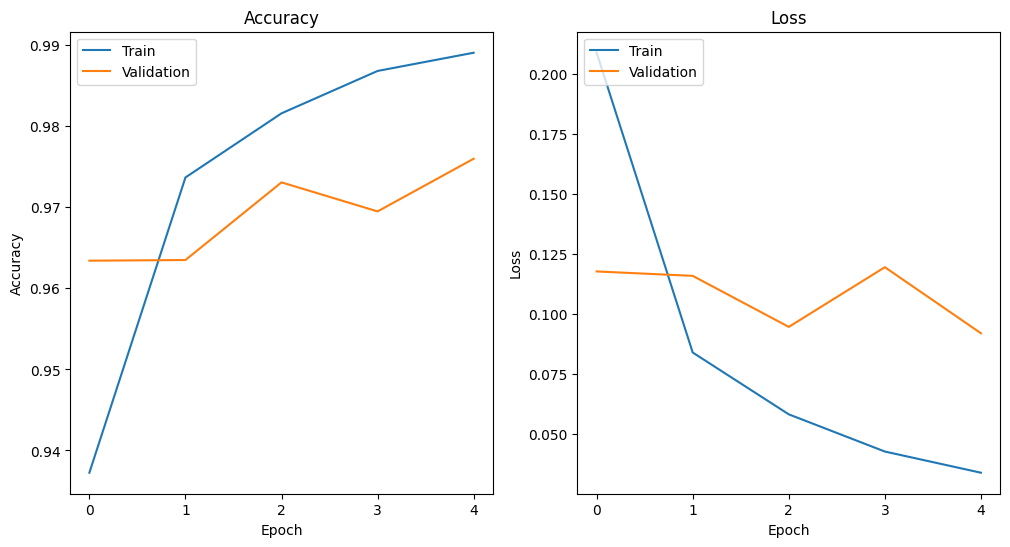

In [6]:
# Plot training & validation accuracy values and loss values per epoch
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_xticks(range(epochs))
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_xticks(range(epochs))
    ax[1].legend(['Train', 'Validation'], loc='upper left')


plot_history(history)

In [68]:
# Evaluate the model on the test set and report test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
# print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.9760


From the above, we can safely say that the model is overfitting, since both train accuracy is much higher than validation accuracy and validation loss starts increasing and is much higher than train loss, however training loss is still decreasing.

We'll try to fix this by tuning the hyperparameters, specifically adding more regularization (increasing the $λ$ parameter / using dropout or batchnorm) and adjusting other parameters such as epochs, learning rate and batch size (lowering batch size also introduces implicit regularization but slows down training).

## Hypermarameter tuning

Model: "mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,389,710 (5.30 MB)

 Trainable params: 1,388,710 (5.30 MB)

 Non-trainable params: 1,000 (3.91 KB)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7309 - loss: 0.8437 - val_accuracy: 0.9512 - val_loss: 0.2295
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9310 - loss: 0.2276 - val_accuracy: 0.9630 - val_loss: 0.1269
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9512 - loss: 0.1574 - val_accuracy: 0.9690 - val_loss: 0.0985
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9578 - loss: 0.1341 - val_accuracy: 0.9708 - val_loss: 0.0957
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9630 - loss: 0.1167 - val_accuracy: 0.9751 - val_loss: 0.0836
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9687 - loss: 0.0998 - val_accuracy: 0.9769 - val_loss: 0.0791
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9746 - loss: 0.0821 - val_accuracy: 0.9786 - val_loss: 0.0755
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9745 - loss: 0.0791 - val_accuracy: 0.9783 - v

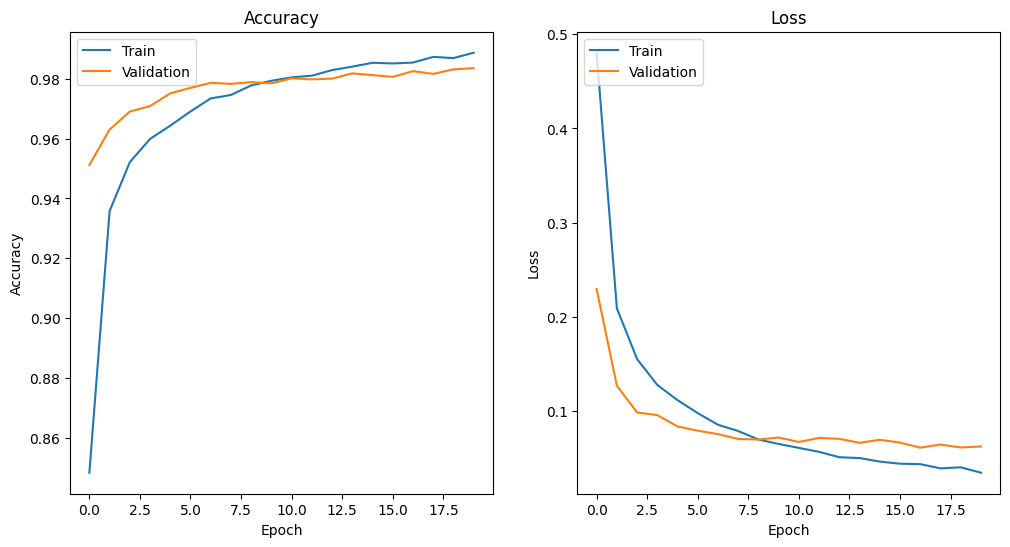

In [43]:
# Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance
epochs = 20
batch_size = 512
lr = 1e-3
l2 = 1e-1
activation = 'gelu'

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(1000, activation=activation),
    layers.Dropout(0.6),
    layers.Dense(500, activation=activation),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(200, activation=activation),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
], name='mlp')
model.summary()

optim = keras.optimizers.Adam(weight_decay=l2, learning_rate=lr)
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
plot_history(history)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

After some (a lot) experimentation, we have managed to get a model with almost 98.5% accuracy on the test set, which is a significant improvement, after making the following changes:

- changed activation from ReLU to GELU
- inserted another hidden layer and inreased number of neurons on the hidden layers to increase model's expressive power
- inserted dropout layers between hidden layers to reduce overfitting, which was already high before and would increase even more as the number of hidden layers increased as well
- increased weight decay factor to 0.1 from 0.0001, for the same reason as above
- inserted a batch notrmalisation layers between the hidden layers
- increased batch size from 64 to 512 to speed up training, allowing for the use of 20 epochs (up from 5)

Even though this model still appears to be overfitting, it is not near the same extent as before, and it also has the performance to back it up. In the following results we will see whether choosing a different amount of trainng data available would have given better results (less data would mean higher generalizaion and thus less overfitting, maybe leading to higher performance).

Overall however, the performance is quite good for a rather simple model that trains in just less than 25 seconds.

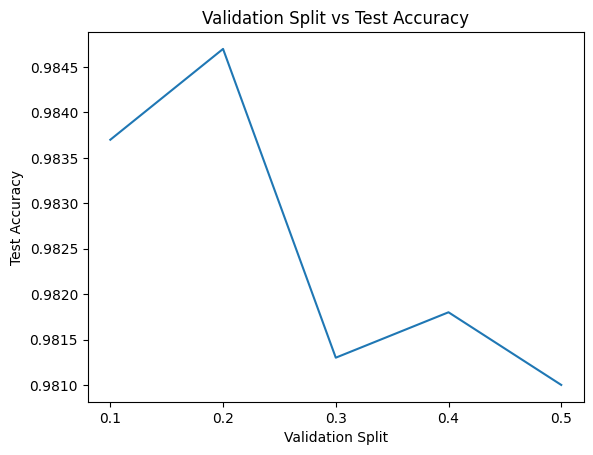

In [59]:
# Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)
# to do this, we can just alter the validation_split parameter (higher validation split means less training data)

vals = [0.1, 0.2, 0.3, 0.4, 0.5]
test_accs = []

for val in vals:
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(1000, activation=activation),
        layers.Dropout(0.6),
        layers.Dense(500, activation=activation),
        layers.Dropout(0.4),
        layers.BatchNormalization(),
        layers.Dense(200, activation=activation),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ], name='mlp')

    optim = keras.optimizers.Adam(weight_decay=l2, learning_rate=lr)
    model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=val, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    test_accs.append(test_acc)

plt.plot(vals, test_accs)
plt.xlabel('Validation Split')
plt.ylabel('Test Accuracy')
plt.title('Validation Split vs Test Accuracy')
plt.xticks(vals)
plt.show()

Finally, we can see that the 0.2 validation_split is the sweet spot for model performance, leaving just enough training data, so we did good to choose it from the start. However if we had chosen a different value from the beggining, maybe we would have decided on different hyperparameters yielding the same performance overall as with the current model with 0.2 validation_split.